# 확률과 통계 소개
이 노트북에서는 이전에 논의했던 몇 가지 개념을 다뤄보겠습니다. 확률과 통계의 많은 개념은 Python의 데이터 처리 주요 라이브러리인 `numpy`와 `pandas`에서 잘 구현되어 있습니다.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## 확률 변수와 분포
0에서 9까지의 균등 분포에서 30개의 값을 샘플링해 봅시다. 또한 평균과 분산도 계산해 보겠습니다.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


샘플에 얼마나 다양한 값이 있는지 시각적으로 추정하기 위해 **히스토그램**을 그릴 수 있습니다.


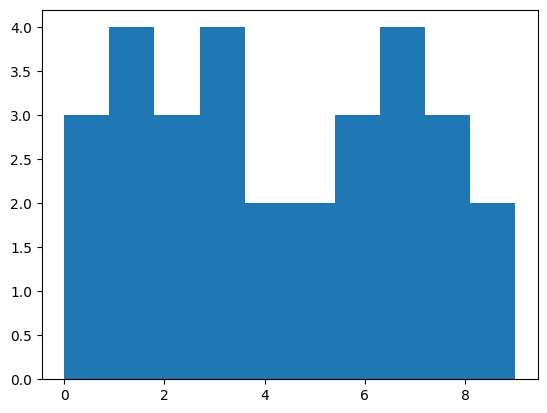

In [119]:
plt.hist(sample)
plt.show()

## 실제 데이터 분석

평균과 분산은 실제 데이터를 분석할 때 매우 중요합니다. [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)에서 야구 선수에 대한 데이터를 불러옵시다.


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


우리는 여기서 데이터 분석을 위해 [**Pandas**](https://pandas.pydata.org/)라는 패키지를 사용하고 있습니다. Pandas와 Python에서 데이터를 다루는 방법에 대해서는 이 강의 후반부에서 더 자세히 다룰 예정입니다.

이제 나이, 키, 몸무게의 평균값을 계산해 봅시다:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

이제 키에 집중하여 표준 편차와 분산을 계산해 봅시다:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


평균 외에도 중앙값과 사분위를 살펴보는 것이 합리적입니다. 이는 **박스 플롯**을 사용하여 시각화할 수 있습니다.


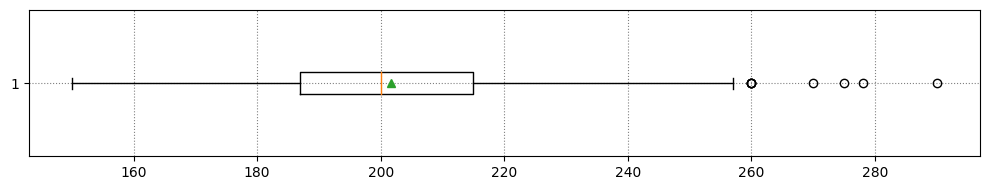

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

우리는 또한 데이터셋의 부분 집합에 대해 박스 플롯을 만들 수 있습니다. 예를 들어, 플레이어 역할별로 그룹화하여 만들 수 있습니다.


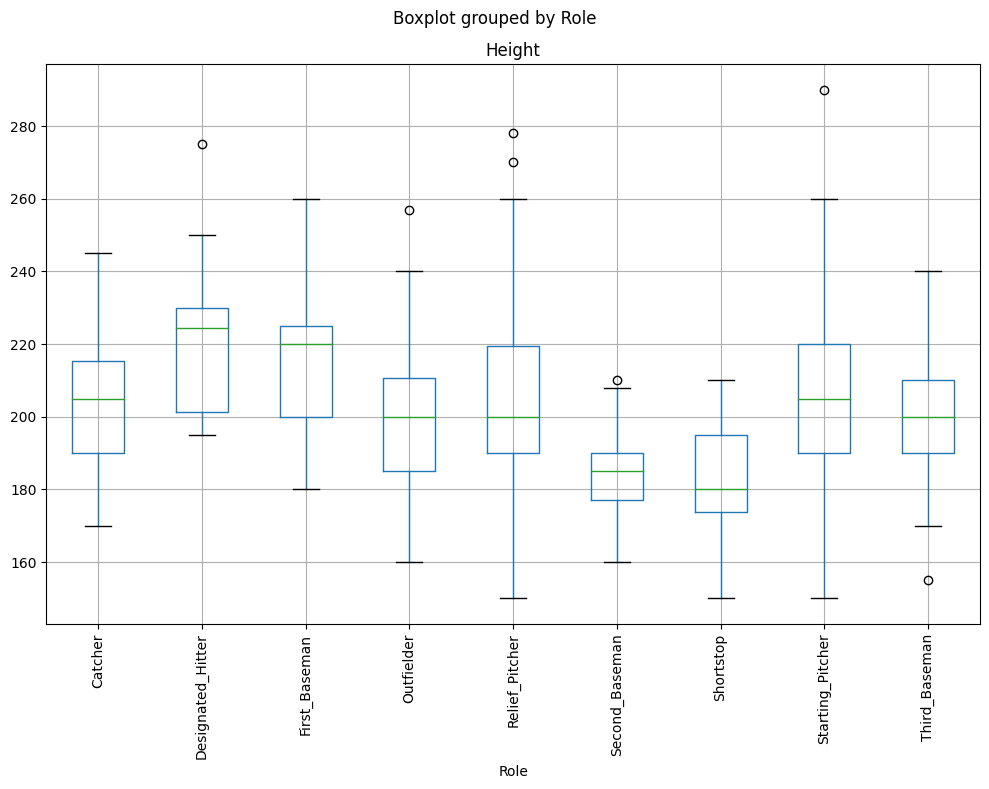

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **참고**: 이 다이어그램은 평균적으로 1루수의 키가 2루수의 키보다 더 크다는 것을 시사합니다. 나중에 우리는 이 가설을 더 공식적으로 검증하는 방법과, 우리의 데이터가 이를 보여주기에 통계적으로 유의미하다는 것을 입증하는 방법을 배우게 될 것입니다.

나이, 키, 몸무게는 모두 연속 확률 변수입니다. 이들의 분포가 어떻게 생겼을지 생각해보세요. 이를 알아보는 좋은 방법은 값들의 히스토그램을 그려보는 것입니다:


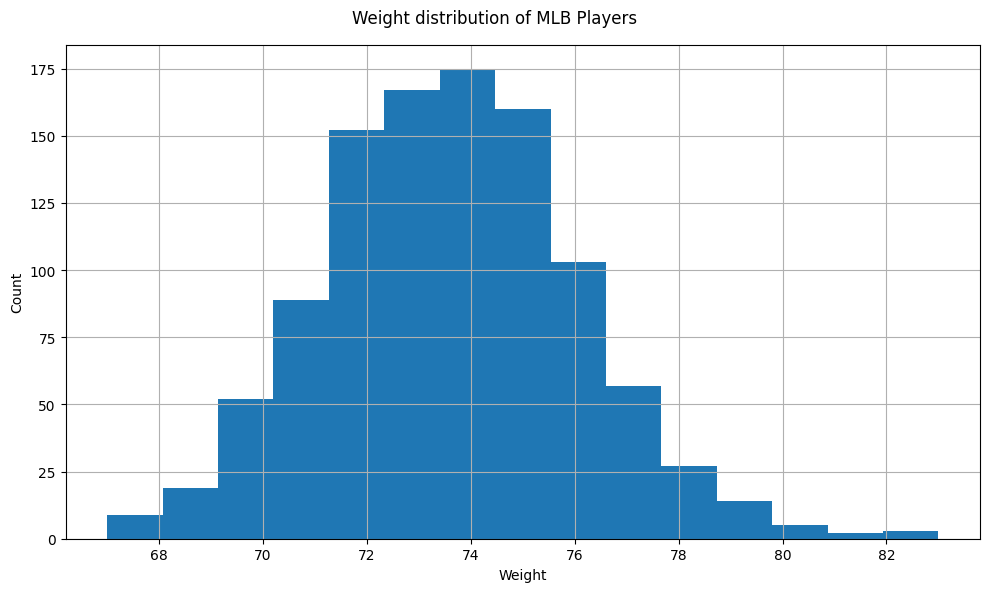

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## 정규 분포

우리의 실제 데이터와 동일한 평균과 분산을 가지는 정규 분포를 따르는 인공적인 체중 샘플을 만들어 봅시다:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

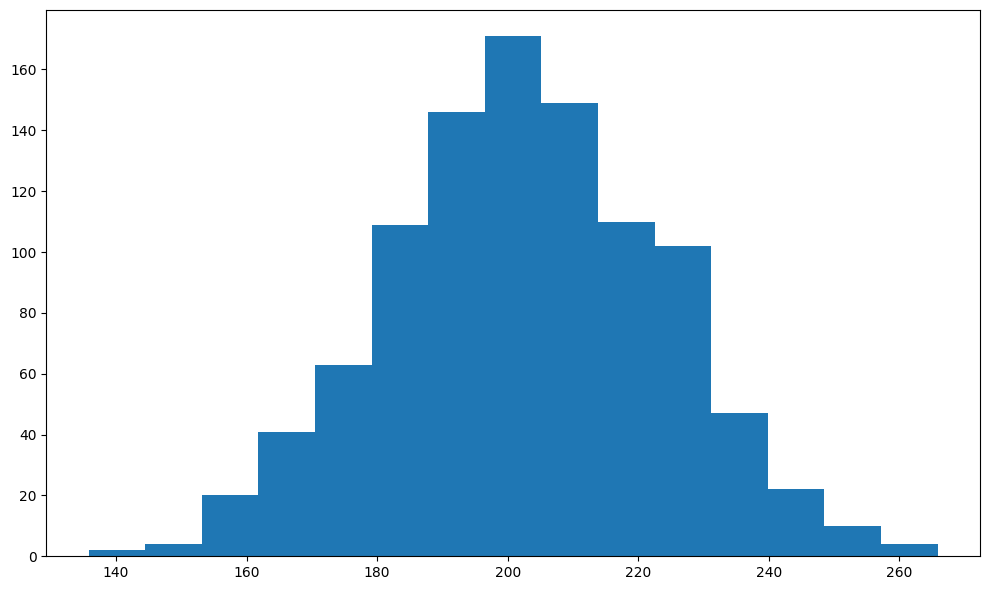

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

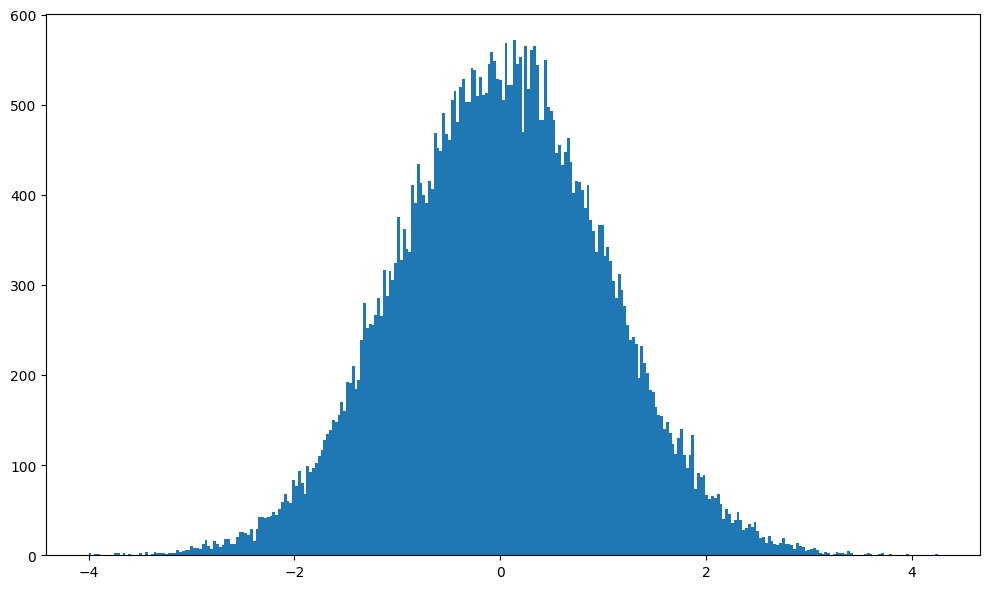

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

실제 생활에서 대부분의 값은 정규 분포를 따르기 때문에, 샘플 데이터를 생성할 때 균일한 난수 생성기를 사용해서는 안 됩니다. 균일 분포(`np.random.rand`로 생성됨)를 사용하여 무게를 생성하려고 하면 다음과 같은 일이 발생합니다:


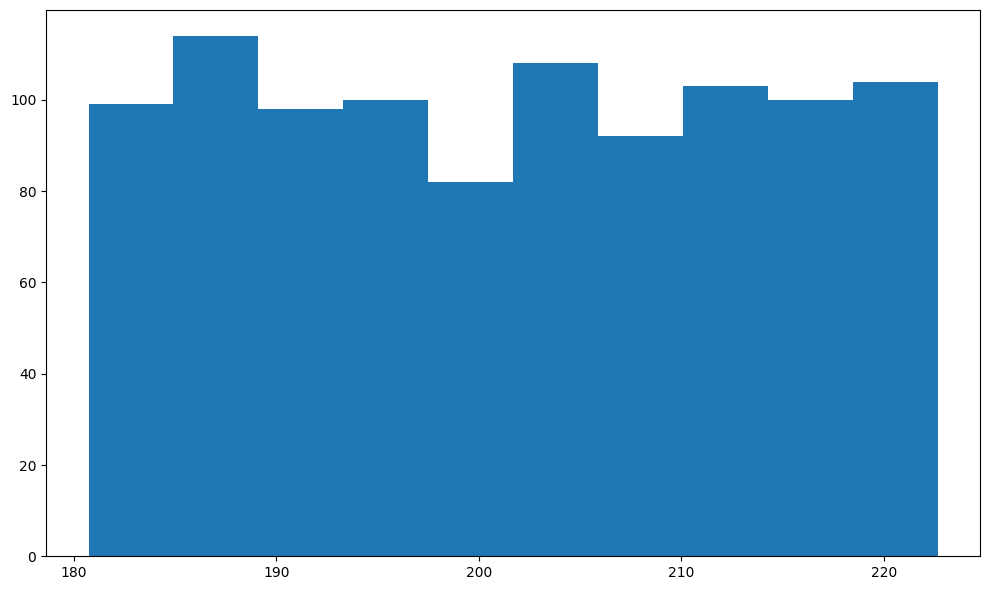

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## 신뢰 구간

이제 야구 선수들의 몸무게와 키에 대한 신뢰 구간을 계산해 봅시다. 우리는 [이 stackoverflow 토론](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data)에서 제공된 코드를 사용할 것입니다:


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## 가설 검정

우리의 야구 선수 데이터셋에서 다양한 역할을 살펴봅시다:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


우리는 구간들이 겹치지 않는다는 것을 알 수 있습니다.

가설을 증명하는 더 통계적으로 올바른 방법은 **Student t-test**를 사용하는 것입니다:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


`ttest_ind` 함수가 반환하는 두 가지 값은 다음과 같습니다:
* p-value는 두 분포가 동일한 평균을 가질 확률로 간주될 수 있습니다. 우리의 경우, p-value가 매우 낮아, 1루수가 더 키가 크다는 강력한 증거를 지지합니다.
* t-value는 t-검정에서 사용되는 정규화된 평균 차이의 중간 값으로, 주어진 신뢰 수준에 대한 임계값과 비교됩니다.


## 중심극한정리를 이용한 정규분포 시뮬레이션

Python의 의사난수 생성기는 균등분포를 제공하도록 설계되어 있습니다. 정규분포를 생성하려면 중심극한정리를 활용할 수 있습니다. 정규분포 값을 얻기 위해서는 균등분포로 생성된 샘플의 평균을 계산하면 됩니다.


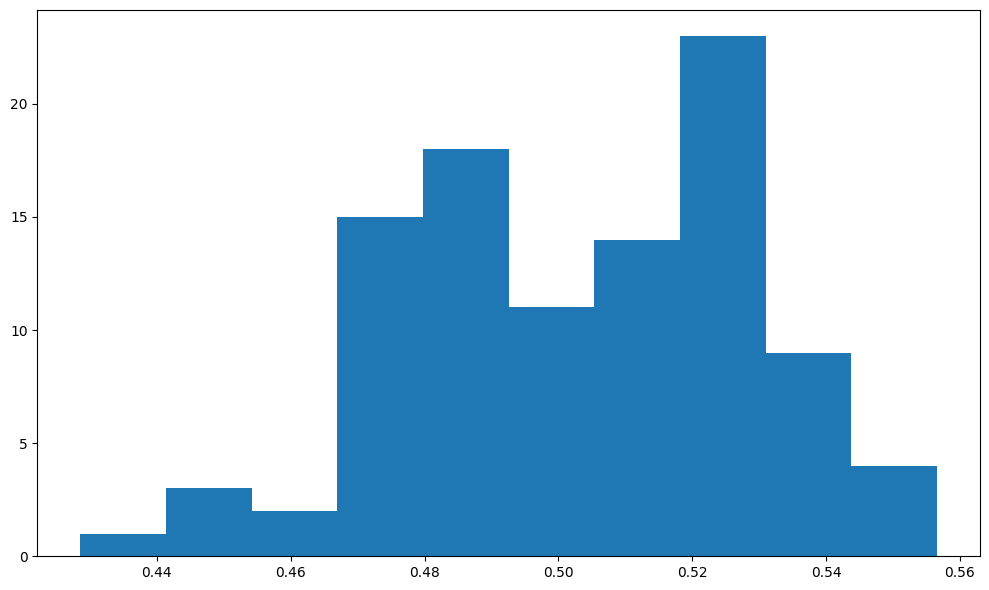

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## 상관관계와 사악한 야구 회사

상관관계는 데이터 시퀀스 간의 관계를 찾을 수 있게 해줍니다. 우리의 간단한 예제에서, 어떤 사악한 야구 회사가 선수들의 키에 따라 급여를 지급한다고 가정해 봅시다. 즉, 선수가 키가 클수록 더 많은 돈을 받는다는 설정입니다. 기본 급여는 $1000이고, 키에 따라 $0에서 $100까지 추가 보너스가 지급된다고 가정합니다. 우리는 MLB의 실제 선수 데이터를 사용하여 그들의 가상의 급여를 계산해 보겠습니다.


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


이제 이러한 시퀀스의 공분산과 상관관계를 계산해 봅시다. `np.cov`는 **공분산 행렬**이라고 불리는 것을 제공하며, 이는 공분산을 다변수로 확장한 것입니다. 공분산 행렬 $M$의 요소 $M_{ij}$는 입력 변수 $X_i$와 $X_j$ 간의 상관관계를 나타내며, 대각선 값 $M_{ii}$는 $X_{i}$의 분산을 나타냅니다. 마찬가지로, `np.corrcoef`는 **상관관계 행렬**을 제공합니다.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


두 변수 간에 강한 **선형 관계**가 있음을 상관계수가 1이라는 것은 의미합니다. 한 값을 다른 값에 대해 플로팅하여 선형 관계를 시각적으로 확인할 수 있습니다:


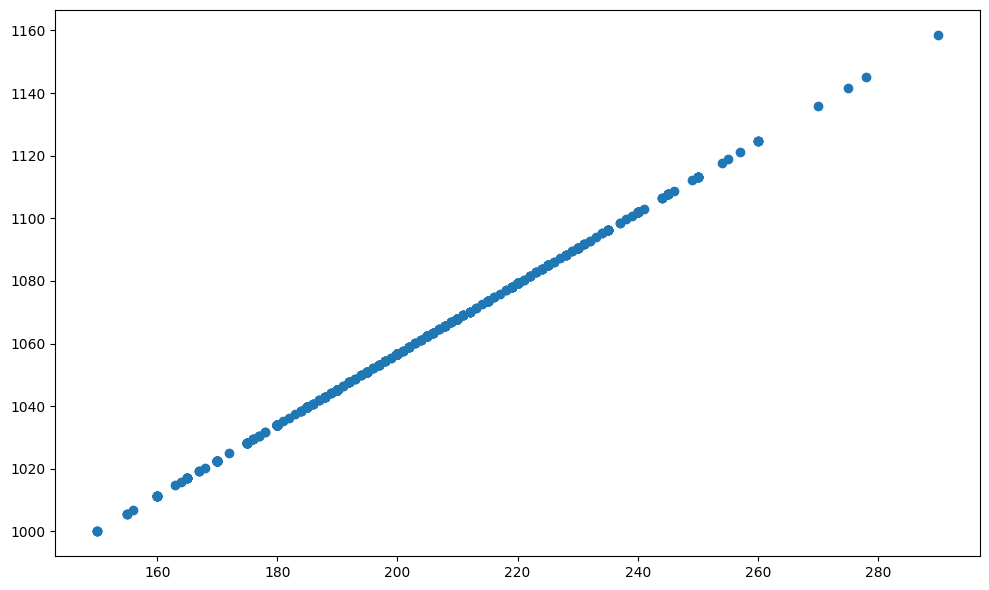

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


이 경우 상관관계는 약간 작아졌지만 여전히 꽤 높습니다. 이제 관계를 더욱 덜 명확하게 만들기 위해 급여에 임의의 변수를 추가하여 약간의 추가 무작위성을 더하고자 합니다. 어떻게 되는지 봅시다:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


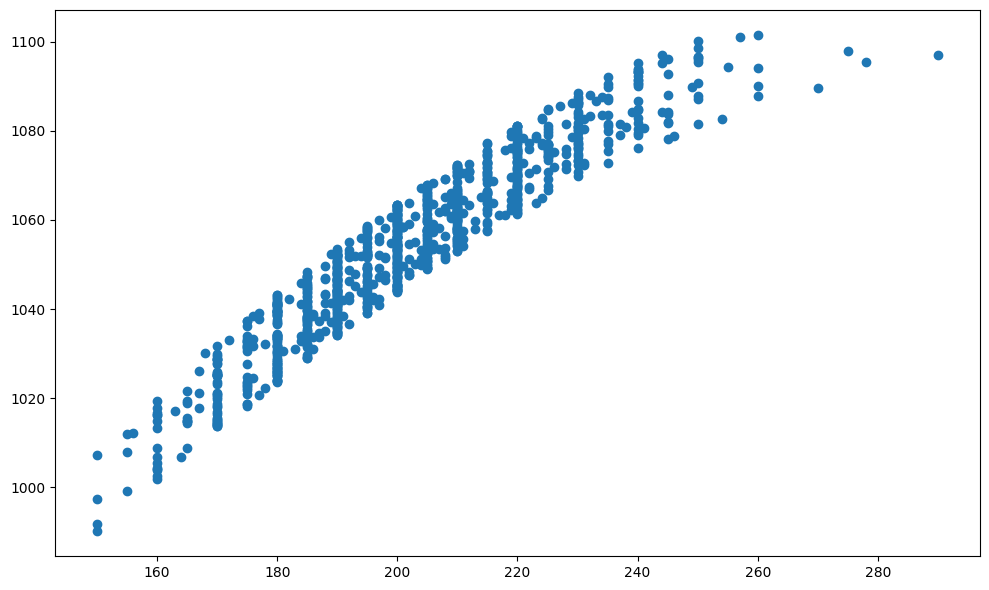

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

왜 점들이 이렇게 수직선으로 정렬되는지 추측할 수 있나요?

우리는 급여와 같은 인위적으로 설계된 개념과 관찰된 변수 *키* 사이의 상관관계를 관찰했습니다. 이제 키와 몸무게 같은 두 개의 관찰된 변수도 상관관계가 있는지 살펴봅시다:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

안타깝게도 결과를 얻지 못했고, 대신 이상한 `nan` 값들만 나왔습니다. 이는 시리즈 내 일부 값이 정의되지 않은 상태로 `nan`으로 표시되었기 때문이며, 이로 인해 연산 결과도 정의되지 않은 상태가 됩니다. 행렬을 살펴보면 `Weight`가 문제의 열임을 알 수 있습니다. 이는 `Height` 값 간의 자기 상관이 계산되었기 때문입니다.

> 이 예시는 **데이터 준비**와 **정리**의 중요성을 보여줍니다. 적절한 데이터 없이는 아무것도 계산할 수 없습니다.

이제 `fillna` 메서드를 사용하여 누락된 값을 채우고 상관관계를 계산해 봅시다:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

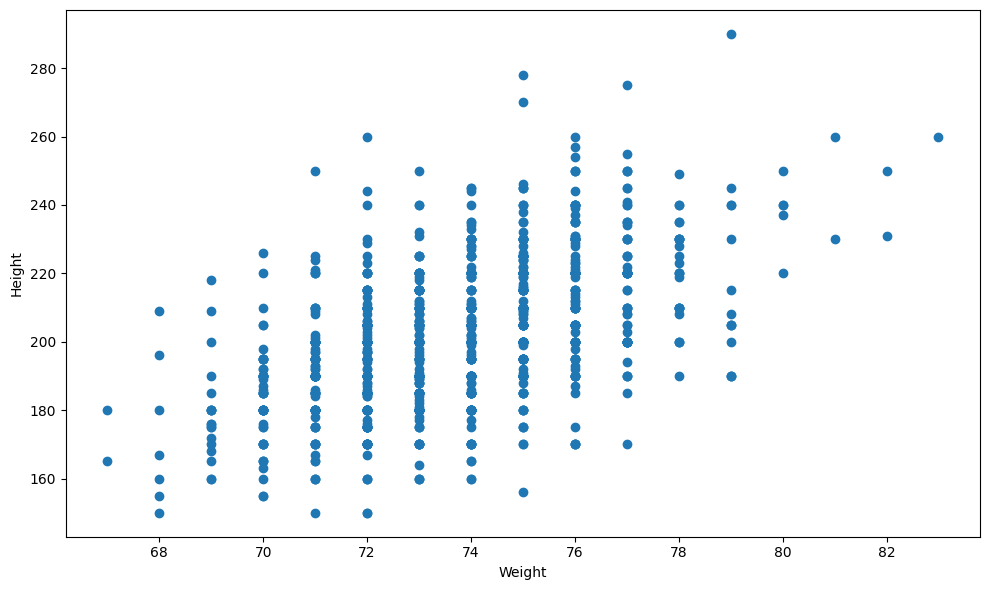

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## 결론

이 노트북에서는 데이터를 활용하여 기본적인 연산을 수행하고 통계 함수를 계산하는 방법을 배웠습니다. 이제 우리는 수학과 통계의 탄탄한 도구를 사용하여 가설을 증명하는 방법과, 주어진 데이터 샘플에서 임의의 변수에 대한 신뢰 구간을 계산하는 방법을 알게 되었습니다.



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있으나, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서를 해당 언어로 작성된 상태에서 권위 있는 자료로 간주해야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생할 수 있는 오해나 잘못된 해석에 대해 당사는 책임을 지지 않습니다.  
